In [1]:
import numpy as np
import prtools as pr
import matplotlib.pyplot as pl

## 6.8 Combining Classifiers

Below, we consider the use of bagging i.e. bootstrapping and aggregating.

- Select training set size $m' << m$
- Select $N$ random subsets of $m'$ training objects
- Train 1 classifier (original: decision tree)
- Combine (original: vote)

Simple dataset 100 by 2 prdataset with 2 classes: [50 50]
Plain 1NN error:  1.4999999998
Bagging 1NN error:  4567.557


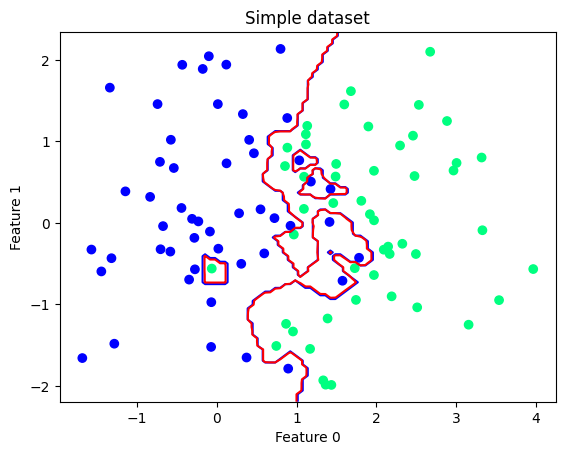

In [12]:
# Compare 1NN with its bagged version on gendats with 10 samples in every class
# Compare in terms of test error as well as visually
# NOTE: Bagging indeed helps in a certain setting! This does not become apparent from the visual decision boundary plot, but it does from the error comparison
train_set = pr.gendats([50, 50])          # Simple 2D classification data
test_set = pr.gendats([1000, 1000])
# TODO: try gendatd
# train_set = pr.gendatd([50, 50])        # Difficult 2D classification data
print(train_set)
pr.scatterd(train_set)

# TODO: Do K-fold cross validation instead, to train K different classifiers by rotating over chunk of training set and average the error over the 1 test set
w_plain = pr.knnc(train_set, 1)           # Train a 1-Nearest neighbor classifier
w_bagging = pr.baggingc(train_set, (pr.knnc([],1), 100))  # Perform bagging on the 1-Nearest neighbor classifier, combining 100 classifiers
pr.plotc(w_plain, levels=[0], colors='b', gridsize=100) 
pr.plotc(w_bagging, levels=[0], colors='r', gridsize=100)  # Plot the decision boundary of the combined classifier

err_plain = pr.testr(test_set, w_plain, 'mse')
err_bagging = pr.testr(test_set, w_bagging, 'mse')
print('Plain 1NN error: ', err_plain)
print('Bagging 1NN error: ', err_bagging)


## 6.9 An AdaBoosting Exercise

Below we use `adaboostc` to experiment with different AdaBoost schemes based on different base classifiers.
The classical one is the so-called decision stump `stumpc`.